In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import sys 
sys.path.append('../../modules/')
import matplotlib_config as mconf
colorI, colorII, colorIII = mconf.set_standard_layout()

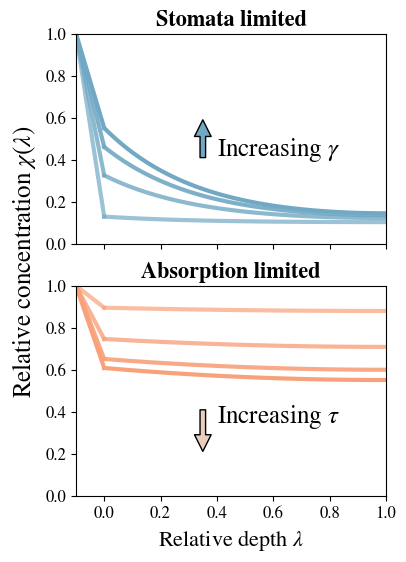

In [ ]:
lambda_st = 0.1
lambdas = np.linspace(0, 1, 100)

chi = lambda x, tau, gamma, chi_=0.1: chi_ + (1-chi_)/(1 + tau*np.tanh(tau)/gamma)*(np.cosh(tau*(1-x)))/(np.cosh(tau))

stomata_lim_fig = []
tau, gammas = (3.0, [0.1, 1.0, 2, 3.0]) # tau, gammas
for gamma in gammas:
    stomata_lim_fig.append(chi(lambdas, tau, gamma))

absorption_lim_fig = []
gamma, taus = (0.3, [0.2, 0.35, 0.45, 0.5]) # gamma, taus
for tau in taus:
    absorption_lim_fig.append(chi(lambdas, tau, gamma))
    
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 6), sharex=True, sharey=True)
alphas = [0.7, 0.8, 0.9, 1.0]

def fill_subplot(ax, data, title, c, fs=16):
    for z, alpha in zip(data, alphas):
        ax.plot(lambdas, z, color=c, alpha = alpha, linewidth=3)
        ax.plot([-lambda_st, 0], [1, z[0]], color=c, alpha=alpha, linewidth=3)
    ax.set_title(title, fontsize=fs, weight='bold')
    ax.set_xlim(-lambda_st, 1)
    ax.set_ylim(0, 1)

fill_subplot(ax1, stomata_lim_fig, 'Stomata limited', c=colorI)
ax1.text(0.4, 0.42, r'Increasing $\gamma$', fontsize=18, color='black')
ax1.annotate('', xy=(0.35, 0.6), xytext=(0.35, 0.4), arrowprops=dict(facecolor=colorI, shrink=0.05))

fill_subplot(ax2, absorption_lim_fig, 'Absorption limited', c=colorIII)
ax2.text(0.4, 0.35, r'Increasing $\tau$', fontsize=18, color='black')
ax2.annotate('', xy=(0.35, 0.2), xytext=(0.35, 0.42), arrowprops=dict(facecolor=colorII, shrink=0.05))
ax2.set_xlabel(r'Relative depth $\lambda$', fontsize=16)
fig.supylabel(r'Relative concentration $\chi(\lambda)$', fontsize=18, x=-0.04)

plt.savefig('../vectorgraphics/figure2E.svg')
plt.show()